# Homework 1: Reading data and regression
## Due September 5th

In class we've been working on developing the tools for linear regression.  In this homework, we'll use those tools to show that one of the original 'big data' problems can be solved quite credibly with ordinary least squares.  Note that this exercise is primarily intended to do two things: 1) provide you with some practice gathering data, and 2) evaluate your ability to reason somewhat abstractly about models.  With respect to the second point, it is in your grade's interest to provide complete and well-reasoned answers to narrative questions posed.  A correct answer can be awarded very few points if its reasoning is absent or unclear, and an incorrect answer can be awarded full points if it is well argued.   

Please turn in your work via github classroom.

## The big one
If you've ever lived in an area prone to seismic activity, you know that people are always a little apprehensive about *the big one*, that giant earthquake (Magnitude greater than 7) that is going to break the pots and collapse the overpasses.  However, the big one rarely happens... until it does.  What happens more frequently is smaller earthquakes.  And even more frequently than that, even smaller earthquakes.  In fact, it's long been understood that earthquake frequency has an inverse relationship with magnitude.  Here, we're going to quantify that relationship for the west coast of the US.  

## Data wrangling
The first thing that we'll need to do is to aquire a dataset that can help us say something about earthquake frequency.  Fortunately, the United States Geologic Survey keeps such a database.  

First, navigate to https://earthquake.usgs.gov/earthquakes/search/.  This is the USGS' central repository for earthquake data.  We'll be interested in data from the last twenty years.  Enter the appropriate date.  Next, we're interested in data from the west coast of the lower 48.  Use the Custom Geographic Region button on the right side of the page, followed by the Draw Rectangle on the Map button.  Draw a rectangle around the west coast, from the Canadian to Mexican border.  Next, open the Output Options tab and select .csv (comma separated values, a plain text format).  Finally, under Limit Results, enter 19999 (the site will throw an error if you make this value bigger).  This series of commands will deliver the ~20k most recent earthquakes of all sizes to occur in this region of the world.  It may take a moment for their server to pull your query together. Download the file.

Next, import the data into ipython.  This is easily done with [Pandas' read_csv function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In [2]:
# Use pandas to import the earthquake data file here
import pandas as p

df = p.read_csv('query.csv')
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2019-09-03T15:05:01.400Z,39.134834,-123.589668,-0.020,3.35,ml,24.0,161.0,0.074710,0.15,...,2019-09-03T19:10:40.014Z,"17km ESE of Navarro Head, CA",earthquake,0.51,2.83,0.307,13.0,automatic,nc,nc
1,2019-09-03T12:41:59.250Z,35.645833,-117.496167,4.520,2.64,ml,38.0,37.0,0.046200,0.18,...,2019-09-03T15:05:42.231Z,"16km SSW of Searles Valley, CA",earthquake,0.22,0.55,0.132,25.0,automatic,ci,ci
2,2019-09-03T08:23:33.250Z,36.199000,-117.885000,2.540,2.59,ml,34.0,61.0,0.084830,0.21,...,2019-09-03T08:34:40.240Z,"14km SE of Olancha, CA",earthquake,0.32,1.83,0.177,24.0,automatic,ci,ci
3,2019-09-03T03:41:29.170Z,35.703000,-117.588667,7.100,3.47,mw,48.0,40.0,0.082340,0.13,...,2019-09-03T16:38:26.278Z,"12km NE of Ridgecrest, CA",earthquake,0.11,0.31,NaN,6.0,reviewed,ci,ci
4,2019-09-03T03:28:37.320Z,35.631000,-117.434333,2.970,2.67,ml,38.0,56.0,0.035130,0.14,...,2019-09-03T11:31:11.930Z,"15km S of Searles Valley, CA",earthquake,0.18,0.29,0.208,25.0,automatic,ci,ci
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,2003-04-22T10:06:23.540Z,40.654167,-124.850000,3.794,2.70,md,22.0,302.0,1.172000,0.14,...,2017-01-04T00:04:41.697Z,offshore Northern California,earthquake,4.75,13.27,0.100,6.0,reviewed,nc,nc
19995,2003-04-21T15:59:40.950Z,36.562167,-120.725333,10.030,2.84,md,51.0,76.0,0.114400,0.17,...,2017-01-04T00:02:37.790Z,Central California,earthquake,0.34,0.49,0.100,76.0,reviewed,nc,nc
19996,2003-04-21T15:46:45.670Z,36.562167,-120.708500,12.610,3.51,ml,102.0,46.0,0.121600,0.12,...,2017-03-17T17:24:08.157Z,Central California,earthquake,0.15,0.33,NaN,14.0,reviewed,nc,nc
19997,2003-04-20T21:49:25.290Z,38.822500,-122.767833,1.273,2.73,md,43.0,50.0,0.003604,0.07,...,2017-01-03T23:59:45.010Z,Northern California,earthquake,0.15,0.19,0.140,36.0,reviewed,nc,nc


Interrogate the Pandas dataframe for the available fields using its built in method 'keys'


In [3]:
df.keys()

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

We're primarily interested in determining the relationship between relative frequency and magnitude.  Extract the magnitude variable from the pandas data frame using the 'mag' key.  

Next, you'll need to determine the number of earthquakes that occured in the data as a function of magnitude.  This is easily done by deciding on a set of bins, and then counting the number of items in each bin.  This is also known as a [histogram](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html), and is easily computed using either numpy or matplotlib.  You'll want to use a fairly large number of bins, say 50 (equally spaced).  *Note that the histogram function provided by either of the above libraries returns total counts rather than relative frequencies: you'll need to compute relative frequencies by dividing the returned counts by the total number of earthquakes in the dataset.*

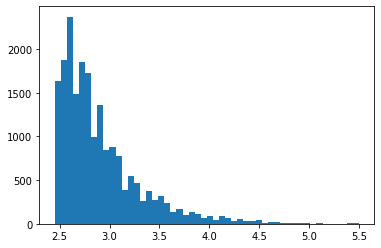

In [5]:
magData = df.mag

import matplotlib.pyplot as plt

counts,bins,patches = plt.hist(magData, 50, [2.45,5.5])

**(20 pts) Make a plot with bin centroids on the $x$-axis and relative frequency on the $y$-axis.  Based on your results, please provide a few sentences describing whether the model $y = w_0 + w_1 x$ is a good fit to the data, if $x$ represents earthquake magnitude and $y$ represents relative frequency.**

The old model is linear in terms of x and this model is an exponential in terms of x. 

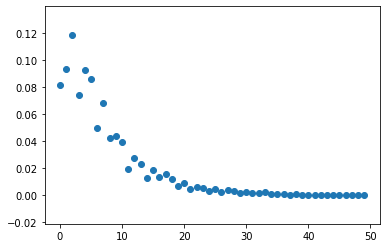

In [6]:
import numpy as np

bins2 = np.arange(50)
freq = counts/19999
plt.scatter(bins2, freq)

As it turns out, a physical model that gives the predicted relative frequency of earthquakes of different magnitudes can be derived from physics, and is given by a so-called *power-law*
$$
y = ax^b
$$
**(20pts) If you wanted to directly fit this power-law model to these data, would you be able to use the linear regression code that we've already developed to do so?  If so, how?  If not, why not?**

No. It's not linear in terms of our parameters and in order for it to work, it would have to be linear in terms of the parameters.

As it turns out, it is not possible to use linear regression to fit this model directly.  However, it can be done by using a clever transformation of the data.  **(20pts) Plot the base-10 logarithm of the event counts.  Now does a linear model seem like a good fit?  If the power law is a good fit to the untransformed data, why does it make sense that a linear model should fit the log-transformed data (HINT: take the logarithm of both sides of the power law)**

**(UPDATE!)** I should have noted this before: The earthquake magnitude $x$ has *already* been log-transformed, which is to say that a magnitude 7 is 10 times more powerful than a magnitude 6.  The power law stated above applies to the earthquake strength prior to it having the logarithm taken.  As such, a more reasonable way to state the question would be as follows: A physical model that gives the predicted relative frequency of earthquakes of different magnitudes can be derived from physics and is given by a so-called *power-law*
$$
y = a P^b,
$$
where $P=10^x$. Show that taking the logarithm of both sides of this equation leads to a linear relationship between the earthquake magnitude $x$ and the log-frequency $\text{log}_{10}(y)$. 

If you use the rules of logarithms to expand, then you get log(a) + blog(P) = $\text{log}_{P}(y)$ . This gives us a linear equation and will work with our linear model.

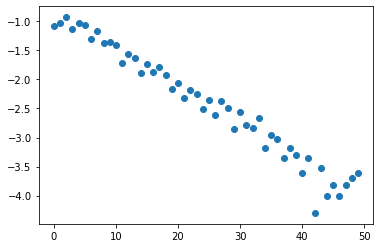

In [7]:
logFreq = np.log10(freq)
plt.scatter(bins2, logFreq)

Finally, **(40pts) use one of the methods that you developed for linear regression in class to fit a line to the log-transformed counts.  What is the slope of that line?  Is the model a good fit for all sizes of earthquake?**

The slope is -0.06408101162010063. I think this would be a good model for most earthquakes. There are a few outliers that might pose a problem for the model, however. But most of the time, I think it would be a good model.

-0.06408101162010063


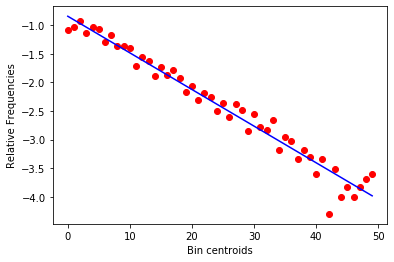

In [11]:
from numpy.linalg import inv

y = logFreq
x = bins2

matrix_x = np.ones([len(x), 2])
matrix_x[:,1] = x

#print(matrix_x)

matrix_x_transpose = np.transpose(matrix_x)
matrix_x_tran_inv = inv(np.dot(matrix_x_transpose, matrix_x))
matrix_x_tran_inv_tran = np.dot(matrix_x_tran_inv, matrix_x_transpose)

matrix_w = np.dot(matrix_x_tran_inv_tran, y)

plt.plot(x,y,'ro')
plt.plot(x,matrix_w[0] + matrix_w[1]*x,'b-')

print(matrix_w[1])

plt.xlabel('Bin centroids')
plt.ylabel('Relative Frequencies')
plt.show()